# PROYECTO 2


### INTEGRANTES
Luisa María Hernández Quintero

Carolina Taborda Vargas

In [9]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.stats import ttest_rel
from collections import Counter
import seaborn as sns


## Parte 1

#### Inspección del archivo y carga en python 

In [ ]:
#Lectura de datos 
df = pd.read_excel("FLIR_groups1and2.xlsx", header=2) #Leer el excel 
#print(tabulate(df, headers='keys', tablefmt='github', showindex=True))

In [ ]:
#Formación de nuevo DataFrame 
# Calcular los promedios de las zonas térmicas
columna1 = df[['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4']].mean(axis=1)
columna2 = df[['Max1L13_1', 'Max1L13_2', 'Max1L13_3', 'Max1L13_4']].mean(axis=1)
columna3 = df[['T_Max1', 'T_Max2', 'T_Max3', 'T_Max4']].mean(axis=1)
columna4 = df[['T_FHCC1', 'T_FHCC2', 'T_FHCC3', 'T_FHCC4']].mean(axis=1)

# Variable aveOralM
list_1 = df['aveOralM']

# Crear nuevo DataFrame con los promedios
df_promedio = pd.DataFrame({
    'Prom_Max1R13': columna1,
    'Prom_Max1L13': columna2,
    'Prom_T_Max': columna3,
    'Prom_TF_HCC': columna4,
    'aveOral': list_1
})

# Mostrar tabla con promedios
print("Promedios de las zonas térmicas:\n")
print(tabulate(df_promedio, headers='keys', tablefmt='github', showindex=True))

##### Analisis: 
Dado el diseño del experimento, la mejor opción para evaluar la equivalencia entre los métodos de medición es a través de la diferencia entre las temperaturas obtenidas con el termógrafo y la temperatura oral. Esto se debe a que se analiza  datos dependientes, correspondientes a las mismas personas, y las dos mediciones buscan capturar la misma variable (temperatura). Al centrarse en las diferencias, se ignora la variabilidad entre sujetos y se enfocamos el analisis exclusivamente en la diferencia entre los dos métodos de medición.
Principalmente este metodo evita que se interprete la variación como una diferencia fisiológica entre individuos, y permite que el estudios se centren en cómo los métodos de medición podrían estar variando en lugar de atribuir esas variaciones a factores biológicos o individuales.

In [72]:
#Obtendiendo diferencia entre temepraturas obtenidas del termografo y temperatura oral 
diff_Max1R13=  list_1-columna1
diff_Max1L13 = list_1-columna2
diff_T_Max= list_1-columna3
diff_TF_HCC= list_1-columna4
#Creando un nuevo dataframe
df_dif = pd.DataFrame({
    'diff_Max1R13': diff_Max1R13,
    'diff_Max1L13': diff_Max1L13,
    'diff_T_Max': diff_T_Max,
    'diff_TF_HCC': diff_TF_HCC
})
print(tabulate(df_dif, headers='keys', tablefmt='github', showindex=True))

|      |   diff_Max1R13 |   diff_Max1L13 |   diff_T_Max |   diff_TF_HCC |
|------|----------------|----------------|--------------|---------------|
|    0 |       1.56     |       1.2125   |     0.8975   |       3.0125  |
|    1 |       2.64     |       2.67     |     2.015    |       3.1575  |
|    2 |       1.6875   |       1.8225   |     1.4275   |       2.44    |
|    3 |       1.8675   |       1.4775   |     1.37     |       2.65    |
|    4 |       1.495    |       1.375    |     1.145    |       1.95    |
|    5 |       1.8575   |       1.7875   |     1.14     |       2.7975  |
|    6 |       1.3075   |       0.975    |     0.7525   |       3.1125  |
|    7 |       1.385    |       1.62     |     0.81     |       2.7625  |
|    8 |       1.2825   |       1.1675   |     0.7375   |       1.4425  |
|    9 |       1        |       1.125    |     0.685    |       1.635   |
|   10 |       1.265    |       1.34     |     0.735    |       2.5075  |
|   11 |       1.355    |       1.695 

#### Análisis exploratorio de datos

In [ ]:
#Construcción de un DataFrame de los estadisticos de las varibles 

def valores_estadisticos(valores):  #Funcion para calculo de metricas estadisticas

    """
    Función: Calcula varias medidas estadísticas descriptivas a partir de una lista o array de valores.
    Parámetros:
    valores (list): Conjunto de datos numéricos o categóricos.

    Retorna:
    list: Una lista con las medidas estadísticas solicitadas en orden:
     
    Notas:
    - Si los datos no son numéricos, se intentará obtener únicamente la moda.
    - En caso de que no exista una moda única, se devuelve el string 'No única'.
    """
    # Convertir a numpy array por seguridad
    valores = np.array(valores)

    # Si no son numéricos (excepto moda), devolver NaN
    if not np.issubdtype(valores.dtype, np.number):
        media = mediana = sd = mad = varianza = iqr = cv = cvm = np.nan
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
    else:
        media = np.mean(valores)
        mediana = np.median(valores)
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
        sd = np.std(valores, ddof=1)
        mad = np.mean(np.abs(valores - np.mean(valores)))
        varianza = np.var(valores, ddof=1)
        iqr = np.percentile(valores, 75) - np.percentile(valores, 25)
        cv = sd / media if media != 0 else np.nan
        cvm = mad / media if media != 0 else np.nan

    return [media, mediana, moda, sd, mad, varianza, iqr, cv, cvm]

# Calculamos los valores estadísticos por variable
estadisticas = {nombre: valores_estadisticos(lista) for nombre, lista in df_dif.items()}

# Convertimos a DataFrame con los nombres de filas
estadisticas_df = pd.DataFrame(estadisticas, index=["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV", "CVM"])

# Mostramos el resultado
print(tabulate(estadisticas_df, headers='keys', tablefmt='github', showindex=True))


Analizando el comportamiento de las métricas calculadas en las variables se puede ver una variación  en los datos de la SD y la MAD de cada uno de ellos; donde el valor de SD es mayor para todos los casos en comparación con el valor de la MAD. Lo que puede expresar este resultado es que haya datos atípicos en el estudio. 

##### Confimacion de datos atipicos 

In [ ]:
#Uso de rango intercuartil para determinar si hay datos atipicos 
def analizar_outliers_con_grafico(serie, nombre):
    """
    Función para analizar outliers en una serie numérica de pandas.
    
    Argumentos:
    - serie: una columna o serie de pandas (por ejemplo, df["edad"]) que contenga datos numéricos.
    - nombre: una cadena de texto con el nombre descriptivo de la serie (para mostrarlo en los gráficos y prints).
    """
    
    # Convertimos la serie en un array de NumPy
    datos = np.array(serie)

    # Eliminamos los valores NaN para evitar errores en el análisis
    datos_validos = datos[~np.isnan(datos)]

    # Si todos los valores son NaN, mostramos un mensaje y salimos de la función
    if len(datos_validos) == 0:
        print(f"\n{nombre}: Todos los valores son NaN")
        return

    # Calculamos el primer y tercer cuartil (Q1 y Q3)
    Q1, Q3 = np.percentile(datos_validos, [25, 75])

    # Calculamos el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Definimos los límites inferior y superior para considerar un valor como outlier
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Obtenemos los valores que están fuera de los límites (outliers)
    outliers = datos_validos[(datos_validos < lim_inf) | (datos_validos > lim_sup)]
    n_outliers = len(outliers)

    # Imprimimos los resultados del análisis
    print(f"\n{'='*60}")
    print(f" ANÁLISIS DE OUTLIERS: {nombre.upper()}")
    print(f"• Valores totales: {len(serie)} | Válidos: {len(datos_validos)}")
    print(f"• Número de outliers: {n_outliers}")

    # Si se detectaron outliers, mostramos sus índices y valores en una tabla
    if n_outliers > 0:
        # Buscamos los índices originales en la serie completa (con NaN incluidos)
        indices_outliers = np.where((datos < lim_inf) | (datos > lim_sup))[0]
        
        # Creamos un DataFrame con los resultados
        df_outliers = pd.DataFrame({
            'Índice': indices_outliers,
            'Valor': datos[indices_outliers]
        })

        # Mostramos la tabla con los outliers
        print("\nOutliers detectados:")
        print(tabulate(df_outliers, headers='keys', tablefmt='github', showindex=False))
    # Gráfico mejorado
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    # Boxplot con seaborn
    ax = sns.boxplot(x=datos_validos, color='skyblue', fliersize=8, linewidth=2)

    sns.stripplot(x=datos_validos, color='darkblue', size=6, jitter=True, alpha=0.6)

    # Líneas para límites de outliers
    plt.axvline(lim_inf, color='red', linestyle='--', label=f'Límite inferior ({lim_inf:.2f})')
    plt.axvline(lim_sup, color='red', linestyle='--', label=f'Límite superior ({lim_sup:.2f})')

    plt.title(f'Distribución y Outliers de {nombre}', fontsize=16)
    plt.xlabel('Valor', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()
#Implementación
analizar_outliers_con_grafico(df_dif["diff_Max1R13"],"diff_Max1R13")
analizar_outliers_con_grafico(df_dif["diff_Max1L13"],"diff_Max1L13")
analizar_outliers_con_grafico(df_dif["diff_T_Max"],"diff_T_Max")
analizar_outliers_con_grafico(df_dif["diff_TF_HCC"],"diff_TF_HCC")

**Analisis de resultados de datos atípicos**
No se realiza un tratamiento de datos atípicos las variables son dependientes, ya que todas las mediciones se realizaron en la misma persona, lo que implica que las diferencias entre ellas podrían ser significativas en el momento de realizar la comparación. En este contexto, sería inconveniente eliminar los datos atípicos o reemplazarlos por valores estimados a partir de otras métricas, ya que esto podría distorsionar los resultados.

Es importante recordar que el objetivo del experimento es evaluar la equivalencia entre dos métodos de medición de temperatura. Las variaciones naturales  entre las zonas de medición son parte del análisis. Eliminar los outliers sin justificación podría sesgar los resultados, privándonos de información valiosa que podría contribuir a una comprensión más completa de cómo se comportan ambos métodos de medición.



In [ ]:
def graficar_histograma(datos, bins=10, titulo="Histograma", xlabel="Valor", ylabel="Frecuencia"):
    """
    Grafica un histograma a partir de una lista de datos.

    Parámetros:
    - datos: lista de valores numéricos
    - bins: número de divisiones del histograma (por defecto 10)
    - titulo: título del gráfico
    - xlabel: etiqueta del eje X
    - ylabel: etiqueta del eje Y
    """
    plt.figure(figsize=(8, 5))
    plt.hist(datos, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

graficar_histograma(diff_Max1R13, bins=10, titulo="Histograma de diff_Max1R13")
graficar_histograma(diff_Max1L13, bins=10, titulo="Histograma de diff_Max1L13")
graficar_histograma(diff_T_Max, bins=10, titulo="Histograma de diff_T_Max")
graficar_histograma(diff_TF_HCC, bins=10, titulo="Histograma de diff_TF_HCC")

Matriz de correlación:
              diff_Max1R13  diff_Max1L13  diff_T_Max  diff_TF_HCC
diff_Max1R13      1.000000      0.793466    0.703726     0.535523
diff_Max1L13      0.793466      1.000000    0.706329     0.525230
diff_T_Max        0.703726      0.706329    1.000000     0.452825
diff_TF_HCC       0.535523      0.525230    0.452825     1.000000


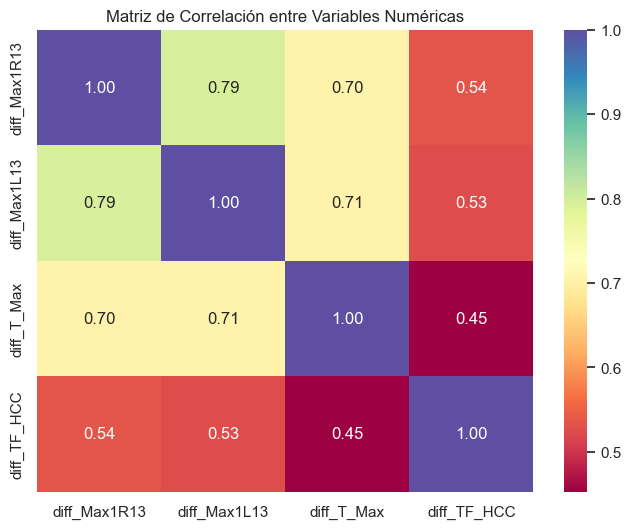

In [81]:
matriz_corr = df_dif.corr()

# Mostrar la matriz
print("Matriz de correlación:")
print(matriz_corr)

# Visualizar con mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='Spectral', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

**Analisis:**
1. Relaciones fuertes:
Las zonas Max1R13 y Max1L13 están muy fuertemente correlacionadas (0.79),indicando que las mediciones en ambas zonas muetran un posible comportamiento similar respecto a las diferencias de temperatura con la temperatura oral.
Max1R13 y T_Max también muestran una relación fuerte (0.70), lo que sugiere que las mediciones de estas zonas tienden a variar de manera similar.

2. Relación más débil:
La correlación más débil se da entre T_Max y TF_HCC (0.45). Esto muetra que estas dos zonas tienen diferencias de temperatura menos relacionadas entre sí, entonces, podrían comportarse de manera más independiente en términos de las variaciones de temperatura con respecto a la oral.

Teniendo en cuenta la equivalencia de la técnica de medición con el termógrafo, es posible que las zonas más correlacionadas (como Max1R13 y Max1L13) muetren una mayor confiabilidad en la comparación con la temperatura oral.

## Parte 2 

#### Prueba de hipotesis 
**En caso de cumplir el supuesto de normalidad**
Según el experimento planteado lo más apropiado es realizar una prueba t para muestras pareadas la cual se utiliza cuando se tienes dos conjuntos de mediciones que provienen del mismo grupo de sujetos. En este caso se compara las diferencias de temperatura entre la temperatura oral y las mediciones en las diferentes zonas del cuerpo.
Esta prueba de hipotesis permite verificar si la media de las diferencias entre las temperaturas son estadísticamente diferente de cero, lo que indicaría una diferencia significativa.

Supuestos de la prueba t para muestras pareadas:
1.	Hipótesis nula (H0): No hay diferencia significativa entre las diferencias de temperatura y la temperatura oral.
2.	Hipótesis alternativa (H1): Hay una diferencia significativa entre las diferencias de temperatura y la temperatura oral.


En la prueba se deben cumplir supuestos de normalidad 

**En caso de no cumplir la prueba de normalidad**
En este contexto, si los datos no cumplen con los supuestos de normalidad requeridos por las pruebas paramétricas, se recurre a una prueba no paramétrica como la de los rangos con signo de Wilcoxon. Esta prueba permite evaluar si las diferencias entre las mediciones de cada técnica en el mismo individuo tienden a centrarse alrededor de cero. En consecuencia, se plantea como hipótesis
1. Hipótesis nula (H0): mediana de las diferencias entre ambas técnicas es igual a cero, lo que indicaría que no existe una diferencia sistemática entre ellas y, por tanto, podrían considerarse equivalentes. 
2. Hipótesis alternativa (H1): sostiene que la mediana de las diferencias es distinta de cero, lo que indicaría que las técnicas no son equivalentes. Esta prueba resulta adecuada para valorar la equivalencia en presencia de datos apareados y no normalmente distribuidos.


##### Supuesto de normalidad 
Dado que hay mas de 50 (n<50) datos se usa prueba de normaidad de Normalidad Kolmogorov-Smirnof y se relaiza la prueba de normalidad sobre la diferencia de temperatura aveOral y el resto de las temperaturas 

In [74]:
# Pruebas de normalidad
def test_normalityKS(data, variable): # Pruaba de Normalidad Kolmogorov-Smirnof 
    """
    data: arreglo de datos a evaluar la normalidad
    variable: string con el nombre de la variable 
    """  
    print(f"\n Análisis de normalidad por Kolmogorov-Smirnov para '{variable}'")

    # Kolmogorov-Smirnov (KS) test
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f" Estadístico = {ks_stat:.4f}, p-valor = {ks_p:.4f}")


# Para diferencia entre el temperatura promedio Max1R13  y temperatura aveOral
test_normalityKS(diff_Max1R13," Analisis dediferencia entre promedio Max1R13  y temperatura aveOral ")
test_normalityKS(diff_Max1L13," Analisis de diferencia entre promedio Max1L13  y temperatura aveOral ")
test_normalityKS(diff_T_Max,"Analisis de diferencia entre promedio T_Max y temperatura aveOral ")
test_normalityKS(diff_TF_HCC,"Analisis de diferencia entre promedio TF_HCC y temperatura aveOral")


 Análisis de normalidad por Kolmogorov-Smirnov para ' Analisis dediferencia entre promedio Max1R13  y temperatura aveOral '
 Estadístico = 0.0298, p-valor = 0.3196

 Análisis de normalidad por Kolmogorov-Smirnov para ' Analisis de diferencia entre promedio Max1L13  y temperatura aveOral '
 Estadístico = 0.0312, p-valor = 0.2671

 Análisis de normalidad por Kolmogorov-Smirnov para 'Analisis de diferencia entre promedio T_Max y temperatura aveOral '
 Estadístico = 0.0286, p-valor = 0.3668

 Análisis de normalidad por Kolmogorov-Smirnov para 'Analisis de diferencia entre promedio TF_HCC y temperatura aveOral'
 Estadístico = 0.0664, p-valor = 0.0002


De acuerdo las hipotesis 
1. Si el p-valor > 0.05, no se rechaza H₀: se concluye que la muestra podría provenir de una distribución normal.

2. Si el p-valor ≤ 0.05, se rechaza H₀: se concluye que la muestra no sigue una distribución normal.

Respuesta: De manera que las diferencias asociadas a las temepraturas Max1R13, Max1L13, T_Max tienen una distribución normal dado que el valor de p es mayor a 0.05, en cambio la diferencia relacionada con TF_HCC no tiene distribución normal ya que el valor p es mucho menor que 0.05, por esto es necesario realizar un trasnformacion para la diferencia asociada a TF_HCC

In [105]:
#Funciones y aplicacion para trasnformacion de datos 
def transform_log(data):
    """
    Realiza una transformación logarítmica en los datos proporcionados.
    Asegúrate de que los datos sean estrictamente positivos para que esta transformación funcione.
    
    Argumentos:
    data -- Array o lista de datos a transformar (debe ser positivo).
    
    Retorna:
    transformed_data -- Datos transformados con el logaritmo natural.
    """
    # Asegúrate de que los datos son mayores que cero para aplicar la transformación logarítmica.
    if np.any(data <= 0):
        raise ValueError("Todos los valores deben ser mayores que 0 para aplicar la transformación logarítmica.")
    
    transformed_data = np.log(data)  # Logaritmo natural (base e)
    return transformed_data

diff_TF_HCClog=transform_log(diff_TF_HCC)
test_normalityKS(diff_TF_HCC,"Analisis de diferencia trasnformada box-cox entre promedio TF_HCC y temperatura aveOral")


from scipy.stats import boxcox
#Transformacion box cox 
def aplicar_boxcox(data):
    """
    Aplica la transformación Box-Cox a un conjunto de datos.
    """
    # Comprobar que los datos sean positivos
    if np.any(data <= 0):
        raise ValueError("Los datos deben ser positivos para aplicar la transformación Box-Cox.")
    
    # Aplicar la transformación Box-Cox
    transformed_data, best_lambda = boxcox(data)
    
    return transformed_data, best_lambda

diff_TF_HCCtr,i=aplicar_boxcox(diff_TF_HCC)
test_normalityKS(diff_TF_HCC,"Analisis de diferencia trasnformada box-cox entre promedio TF_HCC y temperatura aveOral")

from scipy.stats import yeojohnson
def transform_yeojohnson(data):
    """
    Realiza la transformación de Yeo-Johnson en los datos proporcionados.
    
    Argumentos:
    data -- Array o lista de datos a transformar
    
    Retorna:
    transformed_data -- Datos transformados con la transformación Yeo-Johnson
    lambda_ -- El valor de lambda usado para la transformación
    """
    transformed_data, lambda_ = yeojohnson(data)
    return transformed_data, lambda_

diff_TF_HCCyeo,r=transform_yeojohnson(diff_TF_HCC)
test_normalityKS(diff_TF_HCC,"Analisis de diferencia trasnformada Yeo-Jhonson  entre promedio TF_HCC y temperatura aveOral")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Analisis de diferencia trasnformada box-cox entre promedio TF_HCC y temperatura aveOral'
 Estadístico = 0.0664, p-valor = 0.0002

 Análisis de normalidad por Kolmogorov-Smirnov para 'Analisis de diferencia trasnformada box-cox entre promedio TF_HCC y temperatura aveOral'
 Estadístico = 0.0664, p-valor = 0.0002

 Análisis de normalidad por Kolmogorov-Smirnov para 'Analisis de diferencia trasnformada Yeo-Jhonson  entre promedio TF_HCC y temperatura aveOral'
 Estadístico = 0.0664, p-valor = 0.0002


**Analisis de transformación**
Dado que en diversas transfromaciones el p-valor es igual a 0.0002, lo cual es mucho menor que 0.05, rechazamos la hipótesis nula mostrando que los datos no siguen una distribución normal. Esto significa que la transformación  de TF_HCC con respecto a la temperatura oral no ha logrado normalizar completamente los datos atravez de las transformaciones aplicadas. 

In [110]:
#Prueba t  para temperaturas que cumplen el suspuesto de normalidad 
def prueba_t_pareada(muestra1, muestra2, alpha=0.05):
    """
    Realiza una prueba t para muestras pareadas (dependientes).
    
    Parámetros:
        muestra1 (array-like): Primer conjunto de datos (antes, condición A, etc.)
        muestra2 (array-like): Segundo conjunto de datos (después, condición B, etc.)
        alpha (float): Nivel de significancia (por defecto 0.05)
        
    Retorna:
        t_stat (float): Estadístico t
        p_val (float): Valor p
        resultado (str): Interpretación de la prueba
    """
    t_stat, p_val = ttest_rel(muestra1, muestra2)
    
    if p_val < alpha:
        resultado = f"Se rechaza H0 (p = {p_val:.4f} < {alpha}):hay diferencia significativa entre las muestras."
    else:
        resultado = f"No se rechaza H0 (p = {p_val:.4f} ≥ {alpha}):no hay diferencia significativa entre las muestras."
    
    return t_stat, p_val, resultado

t_stat_Max1L13, p_value_Max1L13,r_1 = prueba_t_pareada(list_1,columna1)
t_stat_Max1R13, p_value_Max1R13,r_2= prueba_t_pareada(list_1,columna2)
t_stat_T_Max, p_value_T_Max,r_3 = prueba_t_pareada(list_1,columna3)


# Resultado para cada una de las diferencias
print("Verificación de prueba t usando los valores recopilados del dataFrame original de temperaturas:\n ")
print(f"Max1L13 \n t-stat: {t_stat_Max1L13}, p-value: {p_value_Max1L13}\n resultado: {r_1}\n")
print(f"Max1R13 \n t-stat: {t_stat_Max1R13}, p-value: {p_value_Max1R13}\n resultado: {r_2}\n")
print(f"T_Max \n t-stat: {t_stat_T_Max}, p-value: {p_value_T_Max}\n resultado: {r_3}\n")


#Prueba t para muestras pareadas usando la diferencias de las temperaturas 
def prueba_t_pareadas_diferencias(diferencias):
    """
    Realiza una prueba t para muestras pareadas para determinar si la media de las diferencias
    es significativamente diferente de 0. Se usa cuando se tienen diferencias ya calculadas
    entre dos mediciones (por ejemplo, temperatura oral y las otras mediciones).
    
    Argumento:
    diferencias -- Serie o arreglo con las diferencias entre las mediciones y la temperatura oral.
    
    Retorna:
    tuple: Valor t, p-value
    """
    # Se asume que las diferencias son una muestra de la población
    t_stat, p_value = stats.ttest_1samp(diferencias, 0)  # La hipótesis nula es que la media de las diferencias es 0
    return t_stat, p_value

t_stat_Max1L13, p_value_Max1L13 = prueba_t_pareadas_diferencias(diff_Max1L13)
t_stat_Max1R13, p_value_Max1R13 = prueba_t_pareadas_diferencias(diff_Max1R13)
t_stat_T_Max, p_value_T_Max = prueba_t_pareadas_diferencias(diff_T_Max)
t_stat_TF_HCC, p_value_TF_HCC = prueba_t_pareadas_diferencias(diff_TF_HCCtr)

# Ahora puedes revisar los resultados con más decimales
print("\nVerificación de prueba t usando diferencia de temperaturas:\n ")
print(f"Max1L13\nt-stat: {t_stat_Max1L13:.6f}, p-value: {p_value_Max1L13:.6f}")
print(f"Max1R13 \n t-stat: {t_stat_Max1R13:.6f}, p-value: {p_value_Max1R13:.6f}")
print(f"T_Max \n t-stat: {t_stat_T_Max:.6f}, p-value: {p_value_T_Max:.6f}")

Verificación de prueba t usando los valores recopilados del dataFrame original de temperaturas:
 
Max1L13 
 t-stat: 115.97665724278262, p-value: 0.0
 resultado: Se rechaza H0 (p = 0.0000 < 0.05):hay diferencia significativa entre las muestras.

Max1R13 
 t-stat: 116.95254377036314, p-value: 0.0
 resultado: Se rechaza H0 (p = 0.0000 < 0.05):hay diferencia significativa entre las muestras.

T_Max 
 t-stat: 109.56062965768247, p-value: 0.0
 resultado: Se rechaza H0 (p = 0.0000 < 0.05):hay diferencia significativa entre las muestras.


Verificación de prueba t usando diferencia de temperaturas:
 
Max1L13
t-stat: 116.952544, p-value: 0.000000
Max1R13 
 t-stat: 115.976657, p-value: 0.000000
T_Max 
 t-stat: 109.560630, p-value: 0.000000


In [96]:
from scipy.stats import wilcoxon
def prueba_wilcoxon(muestra1, muestra2):
    """
    Realiza la prueba de Wilcoxon para muestras pareadas (no paramétrica).
    
    Argumentos:
    muestra1 -- Primer conjunto de datos (por ejemplo, temperatura oral).
    muestra2 -- Segundo conjunto de datos (por ejemplo, TF_HCC).
    
    Retorna:
    statistic -- Estadístico de la prueba
    p_value -- Valor p de la prueba
    """
    statistic, p_value = wilcoxon(muestra1, muestra2)
    return statistic, p_value

t_stat_TF_HCC, p_value_TF_HCC=prueba_wilcoxon(list_1,columna4)
print(f"TF_HCC\n t-stat: {t_stat_TF_HCC:.6f}, p-value: {p_value_TF_HCC:.6f}")

TF_HCC
 t-stat: 0.000000, p-value: 0.000000


## Parte 2

### Primer punto: Analsis exploratorio de datos 

In [114]:
#Análisis exploratorio de datos

datos_cel= pd.read_excel("A375.xlsx") #Leer el excel 
print(tabulate(datos_cel, headers='keys', tablefmt='github', showindex=True))

|    |   Bloque2 |   Estimulo2 |   Tiempo2 |   Viabilidad2 |
|----|-----------|-------------|-----------|---------------|
|  0 |         3 |           1 |         7 |       59.7516 |
|  1 |         3 |           1 |         1 |       75.0419 |
|  2 |         3 |           2 |         1 |       75.3769 |
|  3 |         3 |           1 |         7 |       80.1719 |
|  4 |         3 |           1 |         7 |       80.1719 |
|  5 |         3 |           2 |         7 |       82.6087 |
|  6 |         3 |           2 |         1 |       88.9213 |
|  7 |         3 |           2 |         7 |       89.2572 |
|  8 |         3 |           2 |         7 |       89.2572 |
|  9 |         3 |           1 |         1 |       91.4894 |
| 10 |         3 |           2 |         1 |      100.685  |
| 11 |         3 |           1 |         1 |      100.685  |
| 12 |         3 |           1 |         1 |      106.706  |
| 13 |         3 |           2 |         1 |      128.085  |
| 14 |         4 |      

In [115]:
#Construcción de un DataFrame de los estadisticos de las varibles 

#Tipos de datos: Variables numéricas y Variables categóricas

def valores_estadisticos(valores):  #Funcion para calculo de metricas estadisticas

    """
    Función: Calcula varias medidas estadísticas descriptivas a partir de una lista o array de valores.
    Parámetros:
    valores (list): Conjunto de datos numéricos o categóricos.

    Retorna:
    list: Una lista con las medidas estadísticas solicitadas en orden:
     
    Notas:
    - Si los datos no son numéricos, se intentará obtener únicamente la moda.
    - En caso de que no exista una moda única, se devuelve el string 'No única'.
    """
    # Convertir a numpy array por seguridad
    valores = np.array(valores)

    # Si no son numéricos (excepto moda), devolver NaN
    if not np.issubdtype(valores.dtype, np.number):
        media = mediana = sd = mad = varianza = iqr = cv = cvm = np.nan
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
    else:
        media = np.mean(valores)
        mediana = np.median(valores)
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
        sd = np.std(valores, ddof=1)
        mad = np.mean(np.abs(valores - np.mean(valores)))
        varianza = np.var(valores, ddof=1)
        iqr = np.percentile(valores, 75) - np.percentile(valores, 25)
        cv = sd / media if media != 0 else np.nan
        cvm = mad / media if media != 0 else np.nan

    return [media, mediana, moda, sd, mad, varianza, iqr, cv, cvm]

# Calculamos los valores estadísticos por variable
estadisticas = {nombre: valores_estadisticos(lista) for nombre, lista in datos_cel.items()}

# Convertimos a DataFrame con los nombres de filas
estadisticas_df = pd.DataFrame(estadisticas, index=["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV", "CVM"])

# Mostramos el resultado
print(tabulate(estadisticas_df, headers='keys', tablefmt='github', showindex=True))

|          |   Bloque2 |   Estimulo2 |   Tiempo2 |   Viabilidad2 |
|----------|-----------|-------------|-----------|---------------|
| Media    |  3.41667  |    1.5      |  3.5      |    101.884    |
| Mediana  |  3        |    1.5      |  1        |     98.6111   |
| Moda     |  3        |    1        |  1        |     80.1719   |
| SD       |  0.50361  |    0.510754 |  3.02166  |     23.5526   |
| MAD      |  0.486111 |    0.5      |  2.91667  |     18.8448   |
| Varianza |  0.253623 |    0.26087  |  9.13043  |    554.724    |
| IQR      |  1        |    1        |  6        |     31.3869   |
| CV       |  0.147398 |    0.340503 |  0.863332 |      0.23117  |
| CVM      |  0.142276 |    0.333333 |  0.833333 |      0.184963 |


#### Analisis de viabilidad 
Dado que el SD es mayor que el MAD y su distancia se considera significativamente grande por lo tanto se puede deducir que posiblemente valores atípicos 

### Verificación de datos atípicos 

In [ ]:
def analizar_outliers_con_grafico(serie, nombre):
    datos = np.array(serie)
    datos_validos = datos[~np.isnan(datos)]

    if len(datos_validos) == 0:
        print(f"\n{nombre}: Todos los valores son NaN")
        return

    # Cálculo de outliers
    Q1, Q3 = np.percentile(datos_validos, [25, 75])
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = datos_validos[(datos_validos < lim_inf) | (datos_validos > lim_sup)]
    n_outliers = len(outliers)

    # Resultados
    print(f"\n{'='*60}")
    print(f" ANÁLISIS DE OUTLIERS: {nombre.upper()}")
    print(f"• Valores totales: {len(serie)} | Válidos: {len(datos_validos)}")
    print(f"• Número de outliers: {n_outliers}")

    if n_outliers > 0:
        indices_outliers = np.where((datos < lim_inf) | (datos > lim_sup))[0]
        df_outliers = pd.DataFrame({
            'Índice': indices_outliers,
            'Valor': datos[indices_outliers]
        })
        print("\nOutliers detectados:")
        print(tabulate(df_outliers, headers='keys', tablefmt='github', showindex=False))

    # Gráfico mejorado
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    # Boxplot con seaborn
    ax = sns.boxplot(x=datos_validos, color='skyblue', fliersize=8, linewidth=2)

    sns.stripplot(x=datos_validos, color='darkblue', size=6, jitter=True, alpha=0.6)

    # Líneas para límites de outliers
    plt.axvline(lim_inf, color='red', linestyle='--', label=f'Límite inferior ({lim_inf:.2f})')
    plt.axvline(lim_sup, color='red', linestyle='--', label=f'Límite superior ({lim_sup:.2f})')

    plt.title(f'Distribución y Outliers de {nombre}', fontsize=16)
    plt.xlabel('Valor', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()

#como ya sabemos por el proyecto 1 que las variables aveORALM, T_atm y Humidity tienen outliers, se le aplica la función unicamente a las del proyecto 2

analizar_outliers_con_grafico(datos_cel['Viabilidad2'], 'Viabilidad2')

#### Analisis de datos atipicos

* Los datos están ligeramente sesgados hacia la izquierda (asimetría negativa), ya que la mediana está más cerca de Q1 que de Q3.

* No se observan outliers en la viabilidad, lo cual es positivo para los supuestos del ANOVA.

* Existe una alta variabilidad en la viabilidad celular entre condiciones experimentales, lo cual podría deberse a los efectos de los tratamientos-
La distribución no es perfectamente simétrica, por lo que sería útil corroborar la normalidad de los residuos al aplicar ANOVA.

#### Histograma datos  de viabilidad 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_histograma(data, columna, bins=10, color='skyblue'):
    """
    Grafica el histograma de una columna específica de un DataFrame.

    Parámetros:
    - data: DataFrame de pandas que contiene la columna.
    - columna: nombre de la columna a graficar.
    - bins: número de divisiones del histograma (default 10).
    - color: color de las barras del histograma.
    """
    plt.figure(figsize=(10, 5))
    sns.histplot(data[columna], bins=bins, kde=True, color=color, edgecolor='black')
    plt.title(f'Histograma de {columna}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

graficar_histograma(datos_cel,'Viabilidad2')

### Analisis de histogramas 
**Viabilidad:** El histograma confirma lo observado en el boxplot:Distribución ligeramente asimétrica a la derecha, la mayoría de datos concentrados entre 80 y 120. No se  presentan valores atípicos visibles.De manera generla los datos son estable y homogéneo, util para análisis comparativos o modelos simples sin necesidad de transformaciones complejas. 

In [ ]:
def graficar_categorias_desde_lista(lista, titulo="Frecuencia por categoría", color='lightgreen'):
    """
    Genera una gráfica de barras para una lista de datos categóricos.
    """
    conteo = Counter(lista)
    
    categorias = list(conteo.keys())
    frecuencias = list(conteo.values())

    x = list(range(len(categorias)))  # convertir las categorías a índices numéricos

    plt.figure(figsize=(10, 6))
    plt.bar(x, frecuencias, color=color, edgecolor='black')
    plt.xticks(ticks=x, labels=categorias, rotation=45)
    plt.title(titulo)
    plt.xlabel("Categoría")
    plt.ylabel("Frecuencia")

    for i, valor in enumerate(frecuencias):
        plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

graficar_categorias_desde_lista(datos_cel['Estimulo2'], 'Estimulo',color='purple' )
graficar_categorias_desde_lista(datos_cel['Tiempo2'], 'Tiempo',color='lightblue' )

### Analisis de garfico de barras para variables categoricas 
1. **Tiempo:** No hay datos entre esos puntos 1 y 7, lo que refuerza la propiedad categórica de los datos.Esto sugiere que cualquier análisis como ANOVA o pruebas t debe tratar Tiempo2 como una variable de agrupación, no como una variable numérica.

2. **Estimulos:** Cpmfirma que debe ser tratado como una variables de agrupacion al momento de realizar la ANOVA o la prueba t.  


In [ ]:
variables={
    "Estimulo":datos_cel['Estimulo2'],
    "Tiempo":datos_cel['Tiempo2'],
    "Viabilidad":datos_cel['Viabilidad2']

}
data_variables=pd.DataFrame(variables)

# Calcular matriz de correlación
matriz_corr = data_variables.corr()

# Mostrar la matriz
print("Matriz de correlación:")
print(matriz_corr)

# Visualizar con mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='Spectral', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

### Analisi de mapa de calor 
La correlación negativa entre tiempo y viabilidad celular indica que una mayor exposición a las AuNPs reduce la viabilidad, apoyando la hipótesis del efecto térmico acumulativo. Aunque el estímulo tiene poca influencia, el recubrimiento con PEG y el tiempo prolongado parecen clave para aumentar la eficacia del tratamiento.

In [ ]:
#Compobando supuestos 
def test_normalitySW(data, variable): # Prueba de Normalizas Shapiro-Wilks 
    """
    data: arreglo de datos a evaluar la normalidad
    variable: string con el nombre de la variable 
    """
    print(f"\n Análisis de normalidad por Shapiro-Wilk para '{variable}'")
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"Estadístico = {shapiro_stat:.4f}, p-valor = {shapiro_p:.8f}")


def test_homogeneityL(var1, var2, name1, name2): # Prueba de levene
    """
    var1 y var2: variables a las que se corroborará homocedasticidad 
    name1 y name2: strings con el nnombre de las variables
    """
    print(f"\n Análisis de homocedasticidad entre '{name1}' y '{name2}'")

    # Prueba de Levene (no asume normalidad)
    levene_stat, levene_p = stats.levene(var1, var2)
    print(f"Levene test: Estadístico = {levene_stat:.4f}, p-valor = {levene_p:.4f}")


test_normalitySW(datos_cel["Estimulo2"],"Estimulo 2")
test_normalitySW(datos_cel["Estimulo2"],"Estimulo 2")
test_normalitySW(datos_cel["Estimulo2"],"Estimulo 2")


 Análisis de normalidad por Shapiro-Wilk para 'Estimulo 2'
Estadístico = 0.6395, p-valor = 0.00000176
